# Formulating the ideas and getting the data

- OIGA DESMUNZAR POR REGION! Y ENTRAS A ANALIZAR LAS DOS MAYORES REGIONES
- Ranking las 30 más portwfolio weight
- IGUAL POR INDUSTRY! vamos  a analizar por industria las dos industrias

Luego al final la ESG, que pues 
Could be like: 
Analyze the voting on Sustainability reasons of the 5 biggest in Europe and 5 biggest in USA on meetings this year so far. Analyze the ESG of those. And also the performance related decisions

Are the companie's top investments differing a lot from the Fund's voting criteria, specially the ESG?

haz gráficos generales de distribución primero

2.agrupas por sectores, 

- OIGA DESMUNZAR POR REGION! Y ENTRAS A ANALIZAR LAS DOS MAYORES REGIONES
- IGUAL POR INDUSTRY!
quitando estados unidos, cómo es la distribución?
Luego, le preguntas al chat cómo hacer de esto algo sobre ESG

The data as of 30/06/2025

# Objectives of the exploration
1. Find which sector concentrated the majority of the investments of the fund in relative and total terms as of 30/06/2025
2. Find the top 30 companies with the highest Vote % in total
3. Top 10 Highest market value per industry &  per region
4. Top 10 tech companies the fund has more money invested in tech in Europe and the US
4. Check the decisions 


In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [330]:
print(os.getcwd())


c:\Users\Jose Fernando Barros\Desktop\Dotta\Final project\the_fund


In [331]:
df= pd.read_excel('EQ_2025_06_30_Industry.xlsx')


#  Cleaning

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Industry               8374 non-null   object 
 1   Region                 8374 non-null   object 
 2   Country                8374 non-null   object 
 3   Name                   8374 non-null   object 
 4   Market Value(NOK)      8374 non-null   int64  
 5   Market Value(USD)      8374 non-null   int64  
 6   Voting                 7996 non-null   float64
 7   Ownership              8374 non-null   float64
 8   Incorporation Country  8374 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 588.9+ KB


In [333]:
df.head(3)

,Industry,Region,Country,Name,Market Value(NOK),Market Value(USD),Voting,Ownership,Incorporation Country
0,Basic Materials,Asia,India,Aarti Industries Ltd,97148575,9599946,0.47,0.47,India
1,Basic Materials,Europe,Lithuania,AB Grigeo,29295851,2894933,1.75,1.75,Lithuania
2,Basic Materials,Europe,Spain,Acerinox SA,624309219,61692463,1.95,1.95,Spain


In [334]:
df.isna().sum()

Industry                   0
Region                     0
Country                    0
Name                       0
Market Value(NOK)          0
Market Value(USD)          0
Voting                   378
Ownership                  0
Incorporation Country      0
dtype: int64

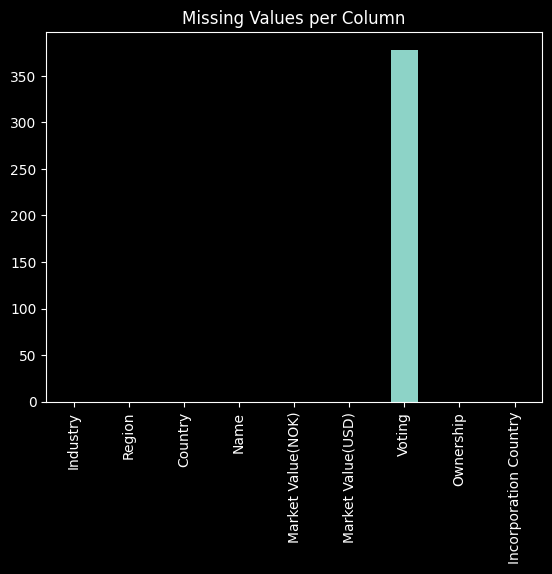

In [335]:
df.isna().sum().plot(kind='bar')
plt.title('Missing Values per Column')
plt.show()

In [336]:
#Understanding how many null values are in the 'Voting' column and how significative they are
null_voting = df['Voting'].isnull().sum()
total_values = len(df)
percentage_null_voting = (null_voting / total_values) * 100
print(f"Percentage of null values in 'Voting' column: {percentage_null_voting:.2f}%")


Percentage of null values in 'Voting' column: 4.51%


**Handling the missing values in the Voting column**

We decided to replace the missing values in the Voting column with the overall mean of the variable. This approach allows us to retain all financial records while maintaining a consistent reference for voting power across the dataset.

Although sector- or region-specific averages could have been computed, doing so would introduce structural bias, as voting rights are determined case by case, depending both on the Fund's investment decisions and on the rights each company’s holdings grant to shareholders, rather than on general industry or regional patterns. Using the global mean thus provides a neutral imputation method that preserves the dataset’s integrity and avoids distorting the overall relationship between Voting and Ownership.

In [337]:
# The original dataframe is preserved for reference.
df_cleaned = df.copy()

In [338]:
mean_value = df_cleaned['Voting'].mean()
df_cleaned['Voting'] = df_cleaned['Voting'].fillna(value=mean_value)

In [339]:
# Verifying that no missing values remain after imputation.
df_cleaned.isna().any()

Industry                 False
Region                   False
Country                  False
Name                     False
Market Value(NOK)        False
Market Value(USD)        False
Voting                   False
Ownership                False
Incorporation Country    False
dtype: bool

**Dropping 'Incorporation Country**

The `Incorporation Country` column is removed as it is not relevant to our analysis.  
It mainly reflects legal registration details, whereas our focus is on operational and financial data.  
Eliminating this column helps streamline the dataset without losing analytical value.


In [340]:
df_cleaned = df_cleaned.drop(columns= ['Incorporation Country'])

In [341]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market Value(NOK),Market Value(USD),Voting,Ownership
0,Basic Materials,Asia,India,Aarti Industries Ltd,97148575,9599946,0.47,0.47
1,Basic Materials,Europe,Lithuania,AB Grigeo,29295851,2894933,1.75,1.75


In [342]:
#The Market value in NOK, the norwegian currency, will be dropped since it is not relevant for the analysis
df_cleaned = df_cleaned.drop(columns= ['Market Value(NOK)'])

In [343]:
#A cleaner format for column name
df_cleaned.rename(columns={
    "Market Value(USD)": "Market_Value_USD",
}, inplace=True)


In [344]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          8374 non-null   object 
 1   Region            8374 non-null   object 
 2   Country           8374 non-null   object 
 3   Name              8374 non-null   object 
 4   Market_Value_USD  8374 non-null   int64  
 5   Voting            8374 non-null   float64
 6   Ownership         8374 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 458.1+ KB


The Market Value column shows the value of the fund’s investment in each company, i.e., the total value of the equity stake the fund holds.

In [345]:
#The printed value matches the value shown by the fund's official website
total_value = df_cleaned['Market_Value_USD'].sum()    
print(f'The total market value of the fund in EQUITIES only is: ${total_value:,.2f}')

The total market value of the fund in EQUITIES only is: $1,387,924,624,421.00


**Creating the Portfolio_Weight Column**

The `Market Value` column reflects the absolute investment value of the fund in each company.  

To better understand the relative importance of each holding, we decided to create a new column: `Portfolio_Weight`, which represents the proportion of the fund's total investments accounted for by each company. 

This allows us to analyze the fund's allocation both in absolute and relative terms.


In [346]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership
0,Basic Materials,Asia,India,Aarti Industries Ltd,9599946,0.47,0.47
1,Basic Materials,Europe,Lithuania,AB Grigeo,2894933,1.75,1.75


In [347]:
df_cleaned['Portfolio_Weight'] = df_cleaned['Market_Value_USD'] / total_value *100

In [348]:
df_cleaned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,9599946,0.47,0.47,0.000692
1,Basic Materials,Europe,Lithuania,AB Grigeo,2894933,1.75,1.75,0.000209


In [349]:
#Checking the dataframe after adding the Portfolio_Weight column
df_cleaned.sort_values(by='Portfolio_Weight', ascending=False)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7541,Technology,North America,United States,NVIDIA Corp,51074326579,1.320000,1.32,3.679906
7477,Technology,North America,United States,Microsoft Corp,49861797013,1.350000,1.35,3.592544
6961,Technology,North America,United States,Apple Inc,38344977557,1.250000,1.25,2.762756
664,Consumer Discretionary,North America,United States,Amazon.com Inc,27280235373,1.170000,1.17,1.965542
6938,Technology,North America,United States,Alphabet Inc,26165252659,0.860000,1.22,1.885207
...,...,...,...,...,...,...,...,...
8217,Utilities,Europe,Russia,Federal Grid Co - Rosseti PJSC,0,1.040469,0.00,0.000000
1335,Consumer Discretionary,North America,United States,LCI Industries,-3419625,1.040469,-0.15,-0.000246
935,Consumer Discretionary,North America,United States,Dave & Buster's Entertainment Inc,-3939187,1.040469,-0.38,-0.000284
803,Consumer Discretionary,North America,Canada,Canada Goose Holdings Inc,-5035500,1.040469,-0.46,-0.000363


In [350]:
#Last cleaning step: re-checking if there are any null values
df_cleaned.isnull().sum()

Industry            0
Region              0
Country             0
Name                0
Market_Value_USD    0
Voting              0
Ownership           0
Portfolio_Weight    0
dtype: int64

In [351]:
#Giving another name to the dataframe for easier reference in the future
#We use the date of the data as reference
fund_H1_2025 = df_cleaned.copy()

# First Objective

1) Identify the sector that holds the largest share of the fund's total investments as of 30/06/2025.  
2) Examine the sector distribution in relative terms to understand the portfolio's composition.


In [352]:
fund_H1_2025.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
0,Basic Materials,Asia,India,Aarti Industries Ltd,9599946,0.47,0.47,0.000692
1,Basic Materials,Europe,Lithuania,AB Grigeo,2894933,1.75,1.75,0.000209


In [353]:
fund_H1_2025.groupby('Industry')['Market_Value_USD'].sum().sort_values(ascending=False)

Industry
Technology                376093487523
Financials                232057896710
Consumer Discretionary    189147731898
Industrials               181945791153
Health Care               126094154938
Real Estate                64984792495
Consumer Staples           61029989574
Basic Materials            42573072149
Telecommunications         40141924524
Energy                     39869570700
Utilities                  33986212757
Name: Market_Value_USD, dtype: int64

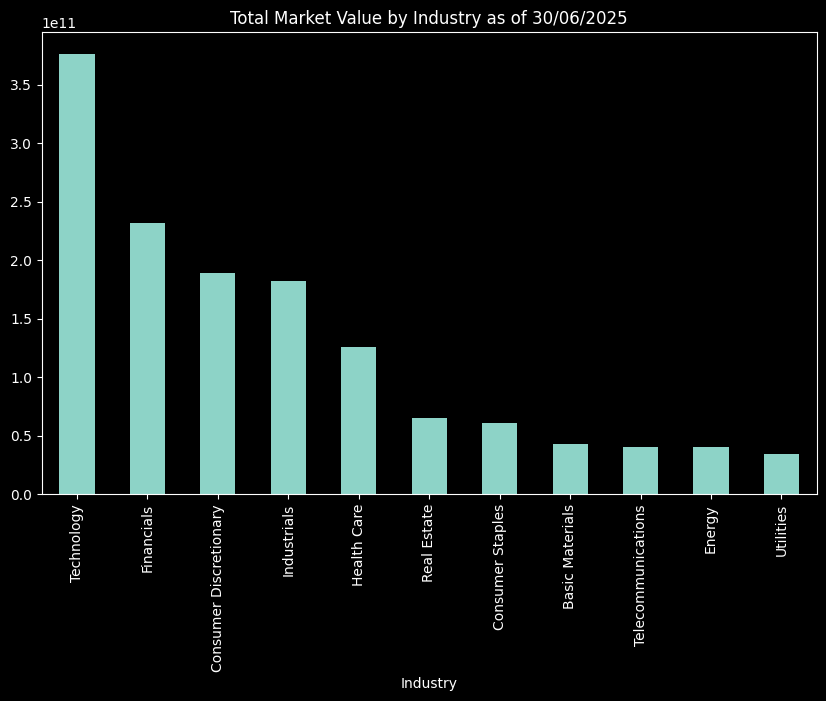

In [354]:
fund_H1_2025.groupby('Industry')['Market_Value_USD'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Total Market Value by Industry as of 30/06/2025')
plt.show()

Now that we know that technology is the industry in which the fund has more investments, let's see it in relative terms to get an idea about the weight of each sector

In [355]:
industry_market_value = fund_H1_2025.groupby('Industry')['Market_Value_USD'].sum()
industry_market_value_percentage = (industry_market_value / industry_market_value.sum()) * 100
industry_market_value_percentage.sort_values(ascending=False)

Industry
Technology                27.097544
Financials                16.719777
Consumer Discretionary    13.628098
Industrials               13.109198
Health Care                9.085087
Real Estate                4.682156
Consumer Staples           4.397212
Basic Materials            3.067391
Telecommunications         2.892227
Energy                     2.872603
Utilities                  2.448707
Name: Market_Value_USD, dtype: float64

We found that technology's investments account for the 27.24%  of the total investments of the fund.
That's understandable, since tech is the biggest sector nowadays overall, though finance and consumer goods have also considerable weight in the portfolio.

# Second Objective

In this section, we explore the fund's allocation across different dimensions, both in terms of the number of holdings and their relative weight within the portfolio.

1) Fund Allocation by Country: Holdings vs Portfolio Weight

Here we analyze the distribution of the fund's holdings by country, comparing the number of companies in which the fund invests versus the proportion of total portfolio value each country represents.  
This comparison provides insight into which markets are more heavily weighted in terms of capital versus sheer number of holdings.


2) Fund Allocation by Industry: Holdings vs Portfolio Weight

This subsection examines how the fund’s holdings are distributed across sectors, again comparing the number of holdings versus their portfolio weight.  
Analyzing sector-level allocation not only highlights areas of strategic focus, risk concentration, or potential growth opportunities, but also provides insight into how the fund is actively positioning itself across different industries over time.


3) Fund Allocation by Region: Holdings vs Portfolio Weight

This subsection examines how the fund’s holdings are distributed across regions, comparing the number of holdings versus their portfolio weight.  
Analyzing region-level allocation helps highlight geographic areas of strategic focus, potential risk concentration, and long-term growth opportunities.  
It also provides insight into how the fund is positioning its capital across global markets and how its exposure differs between the number of holdings and the financial significance of each region.


## 1) Fund Allocation by Country: Holdings vs Portfolio Weight

In [356]:
# Top 10 countries by number of holdings
fund_H1_2025['Country'].value_counts().head(10)

Country
United States     1649
Japan             1381
China              662
India              569
Taiwan             497
South Korea        462
Australia          317
United Kingdom     304
Malaysia           209
Germany            163
Name: count, dtype: int64

In [ ]:
fund_H1_2025['Country'].value_counts(normalize=True).head(10)*100

Country
United States     19.691904
Japan             16.491521
China              7.905422
India              6.794841
Taiwan             5.935037
South Korea        5.517077
Australia          3.785527
United Kingdom     3.630284
Malaysia           2.495820
Germany            1.946501
Name: proportion, dtype: float64

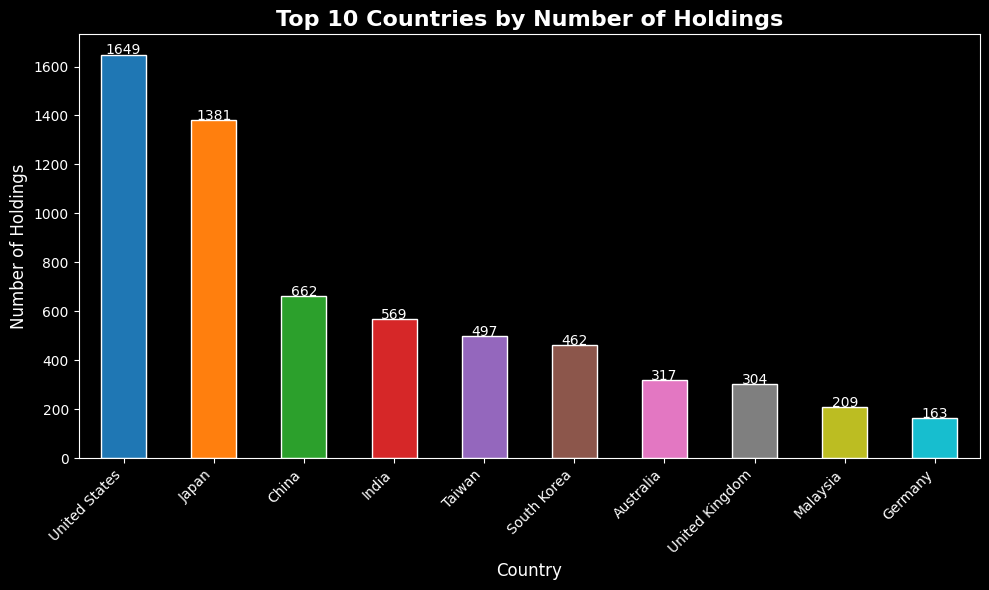

In [358]:
# Top 10 countries by number of holdings
count = fund_H1_2025['Country'].value_counts().head(10)

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Top 10 Countries by Number of Holdings', fontsize=16, weight='bold', color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

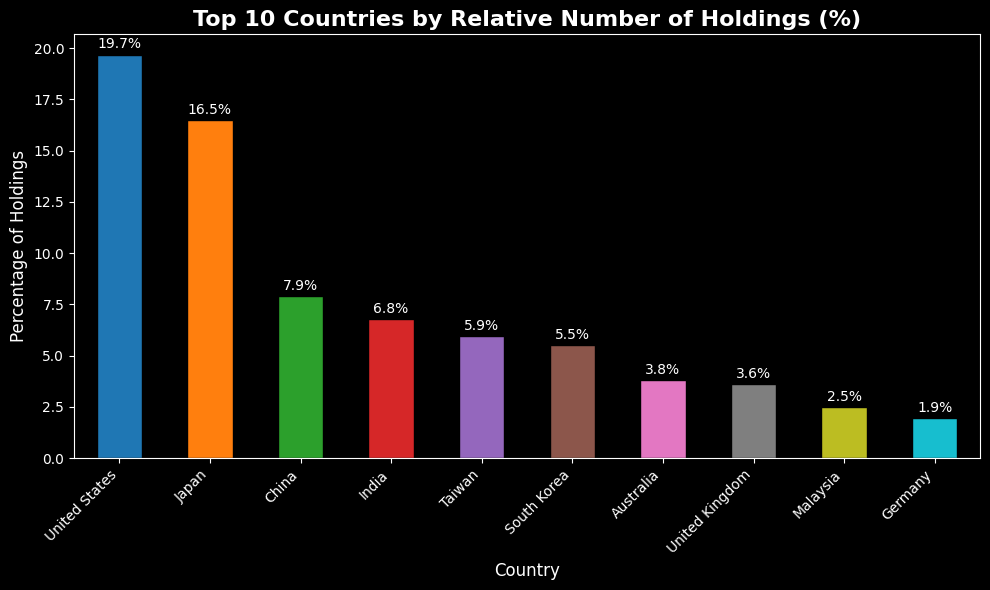

In [359]:
# Top 10 countries by relative number of holdings (%)
count_relative = (fund_H1_2025['Country'].value_counts(normalize=True).head(10)) * 100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Top 10 Countries by Relative Number of Holdings (%)', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [360]:
fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Country']).sum().sort_values(ascending=False).head(10)

Country
United States     54.714662
Japan              6.328589
United Kingdom     5.091178
Germany            3.542248
China              3.508865
Switzerland        3.081551
France             3.038944
Taiwan             2.362666
India              2.333999
Canada             2.185300
Name: Portfolio_Weight, dtype: float64

Text(0.5, 1.0, 'Top 10 Countries by Portfolio Weight (%)')

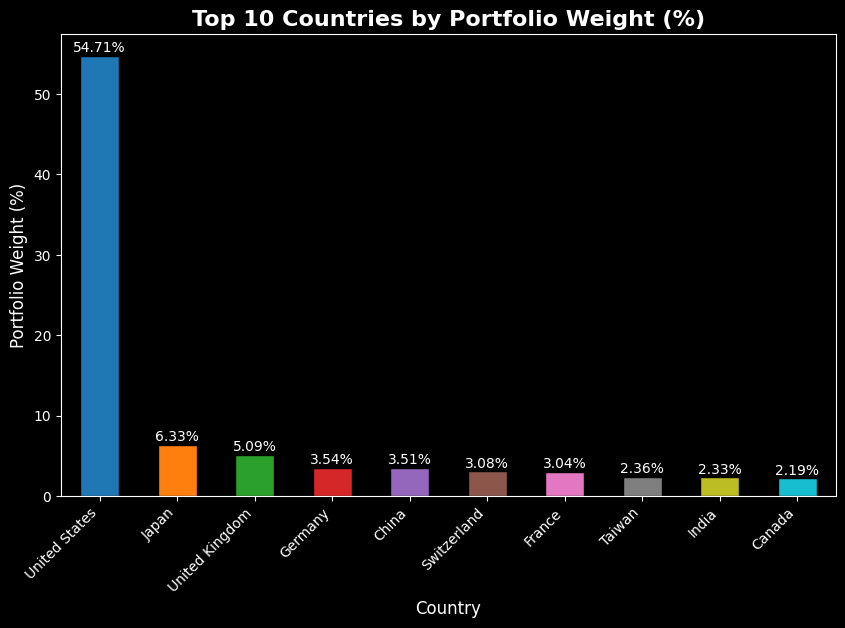

In [361]:
by_weight= fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Country']).sum().sort_values(ascending=False).head(10)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Country', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Portfolio Weight (%)', fontsize=16, weight='bold')


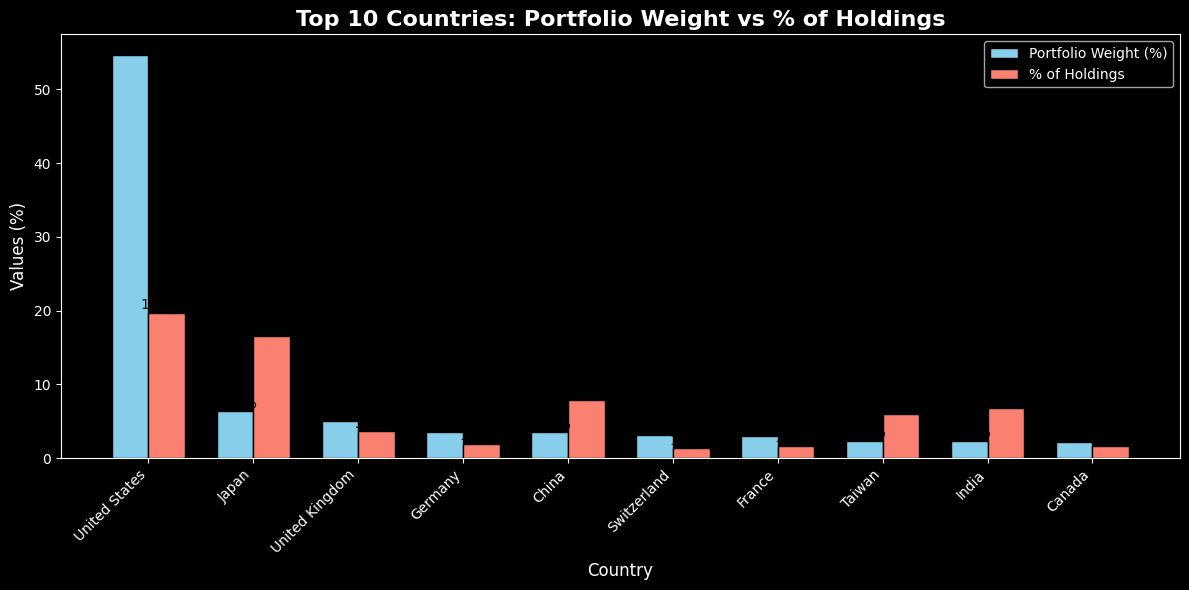

In [362]:
# Data
by_weight = fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Country']).sum().sort_values(ascending=False).head(10)
by_count = (fund_H1_2025['Country'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Top 10 Countries: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()


for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='black')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Fund Allocation by Country: Holdings vs Portfolio Weight – Key Insights**

The comparison between the top 10 countries by portfolio weight and by number of holdings reveals important differences in how the fund distributes its capital. The United States accounts for nearly 55% of the total portfolio weight, while representing around 20% of holdings, showing a clear concentration of value in U.S. assets. Japan, although not as dominant, follows at some distance, holding a similar proportion of companies but contributing only around 6% to the overall portfolio weight.

In contrast, several East Asian markets, including China, India, and Taiwan, show a higher proportion of holdings relative to their portfolio weight. This may reflect the fund’s perspective on the long-term growth potential of East Asia, favoring broad exposure in the region despite smaller current investment sizes. Meanwhile, European and North American countries, such as the United Kingdom, Germany, Switzerland, France, and Canada, display fewer holdings but a much larger share of portfolio weight, suggesting stronger current performance and consolidated value creation.

Overall, the comparison highlights the distinction between number of holdings and capital exposure, illustrating the fund’s dual strategy of maintaining concentration in developed markets while positioning itself for the gradual expansion of East Asian economies.

## 2) Fund Allocation by Industry: Holdings vs Portfolio Weight
After reviewing country-level allocation, we now turn to the distribution of the fund’s investments across different industries.

In [363]:
fund_H1_2025['Industry'].value_counts()

Industry
Industrials               1672
Consumer Discretionary    1429
Financials                1066
Technology                1007
Health Care                767
Basic Materials            613
Real Estate                601
Consumer Staples           559
Utilities                  254
Telecommunications         208
Energy                     198
Name: count, dtype: int64

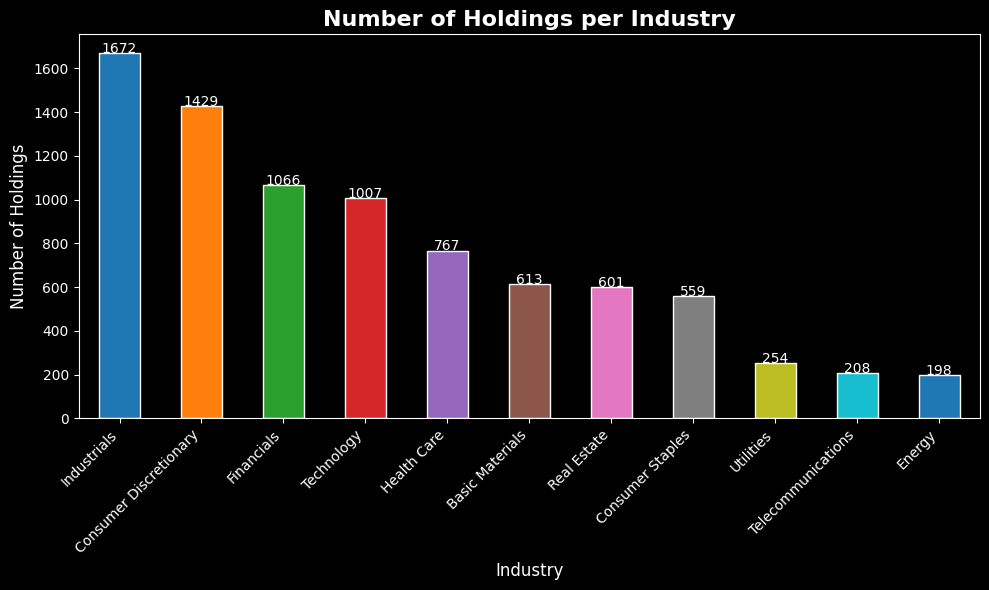

In [364]:
# Industry holdings count
count = fund_H1_2025['Industry'].value_counts()

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Number of Holdings per Industry', fontsize=16, weight='bold', color='white')
plt.xlabel('Industry', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

In [365]:
# Industry by portfolio weight
fund_H1_2025['Industry'].value_counts(normalize=True)*100

Industry
Industrials               19.966563
Consumer Discretionary    17.064724
Financials                12.729878
Technology                12.025316
Health Care                9.159303
Basic Materials            7.320277
Real Estate                7.176976
Consumer Staples           6.675424
Utilities                  3.033198
Telecommunications         2.483879
Energy                     2.364461
Name: proportion, dtype: float64

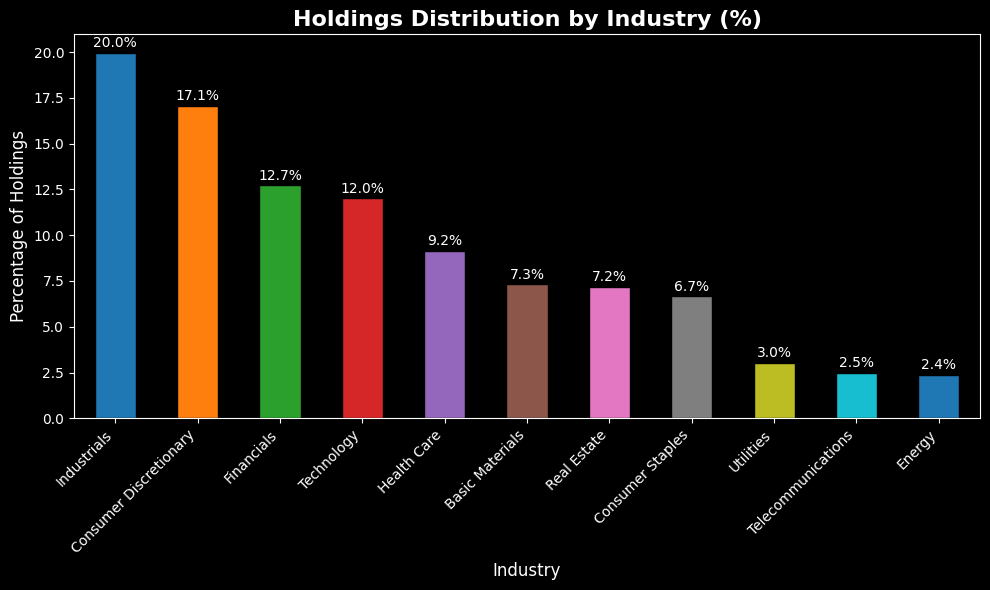

In [366]:
# Industry by relative number of holdings (%)
count_relative = fund_H1_2025['Industry'].value_counts(normalize=True)*100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Holdings Distribution by Industry (%)', fontsize=16, weight='bold')
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [367]:
fund_H1_2025.groupby('Industry')['Portfolio_Weight'].sum().sort_values(ascending=False)

Industry
Technology                27.097544
Financials                16.719777
Consumer Discretionary    13.628098
Industrials               13.109198
Health Care                9.085087
Real Estate                4.682156
Consumer Staples           4.397212
Basic Materials            3.067391
Telecommunications         2.892227
Energy                     2.872603
Utilities                  2.448707
Name: Portfolio_Weight, dtype: float64

Text(0.5, 1.0, 'Industries by Portfolio Weight (%)')

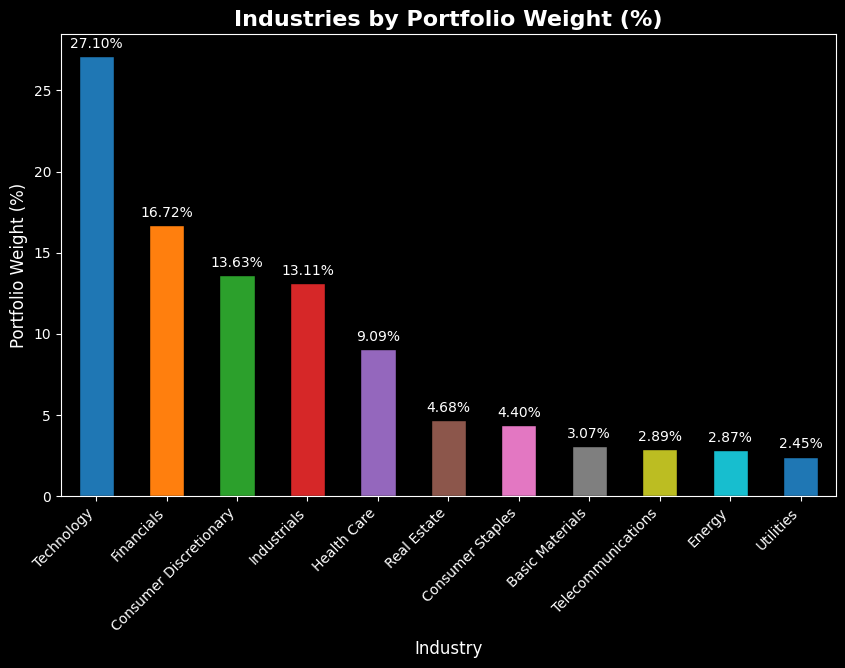

In [368]:
by_weight= fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Industry']).sum().sort_values(ascending=False)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Industry', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Industries by Portfolio Weight (%)', fontsize=16, weight='bold')

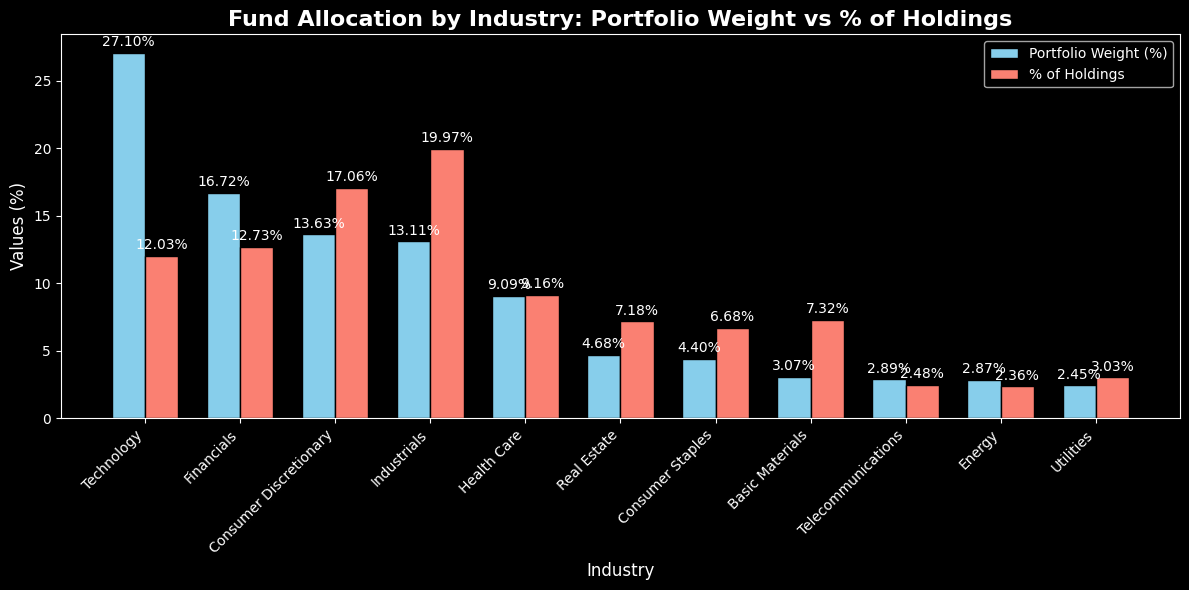

In [369]:
# Data
by_weight = fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Industry']).sum().sort_values(ascending=False)
by_count = (fund_H1_2025['Industry'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Industry', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Fund Allocation by Industry: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()

# Show values on top of bars in white
for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='white')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

plt.show()

**Fund Allocation by Industry: Holdings vs Portfolio Weight – Key Insights**

Analyzing the fund’s holdings by industry highlights differences between the number of holdings and portfolio weight. Industrials and Consumer Discretionary represent the largest number of holdings, reflecting the fund’s broad exposure across companies in these sectors. However, when considering portfolio weight, Technology stands out as the most significant sector, accounting for over 27% of total portfolio weight, despite having fewer holdings than Industrials or Consumer Discretionary.

This discrepancy indicates that while the fund maintains diversified exposure across many companies in traditional sectors, it concentrates capital in high-value, strategically important industries such as Technology and Financials, likely due to their stronger performance and potential for long-term value creation. Sectors like Real Estate, Consumer Staples, Basic Materials, and Utilities have numerous holdings but contribute relatively less to portfolio weight, suggesting smaller average investment sizes per company.

Overall, the fund appears to balance diversification and concentration: it spreads its holdings across multiple sectors to mitigate risk and avoid overloading any single industry, while still allocating the largest share of capital to high-impact sectors like Technology to maximize potential returns.

## 3) Fund Allocation by Region: Holdings vs Portfolio Weight

In [394]:
fund_H1_2025['Region'].value_counts()

Region
Asia             4300
North America    1786
Europe           1501
Oceania           351
Latin America     188
Middle East       129
Africa            119
Name: count, dtype: int64

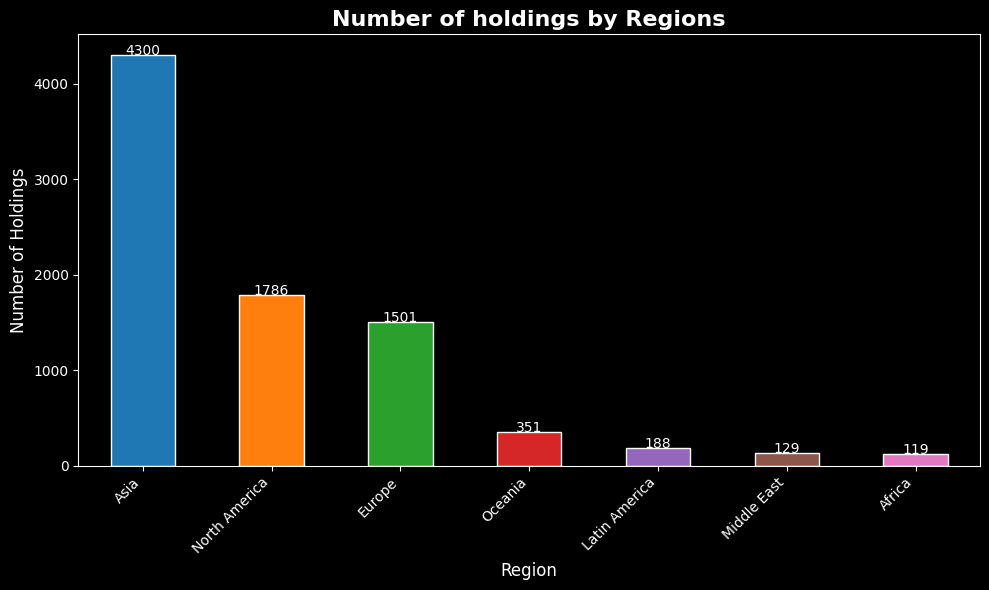

In [395]:
# Number of holdings by Region
count = fund_H1_2025['Region'].value_counts()

# Dark background style
plt.style.use('dark_background')

# Create bar chart with different colors
colors = plt.cm.tab10.colors  

ax = count.plot(
    kind='bar',
    figsize=(10,6),
    color=colors[:len(count)],
    edgecolor='white'  #  for contrast
)

# Title and axis labels
plt.title('Number of holdings by Regions', fontsize=16, weight='bold', color='white')
plt.xlabel('Region', fontsize=12, color='white')
plt.ylabel('Number of Holdings', fontsize=12, color='white')

# Display values on top of bars
for i, v in enumerate(count):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10, color='white')

plt.xticks(rotation=45, ha='right', color='white')  # rotate x labels
plt.yticks(color='white')  # y-axis labels in white
plt.tight_layout()
plt.show()

In [399]:
fund_H1_2025['Region'].value_counts(normalize=True)*100

Region
Asia             51.349415
North America    21.327920
Europe           17.924528
Oceania           4.191545
Latin America     2.245044
Middle East       1.540482
Africa            1.421065
Name: proportion, dtype: float64

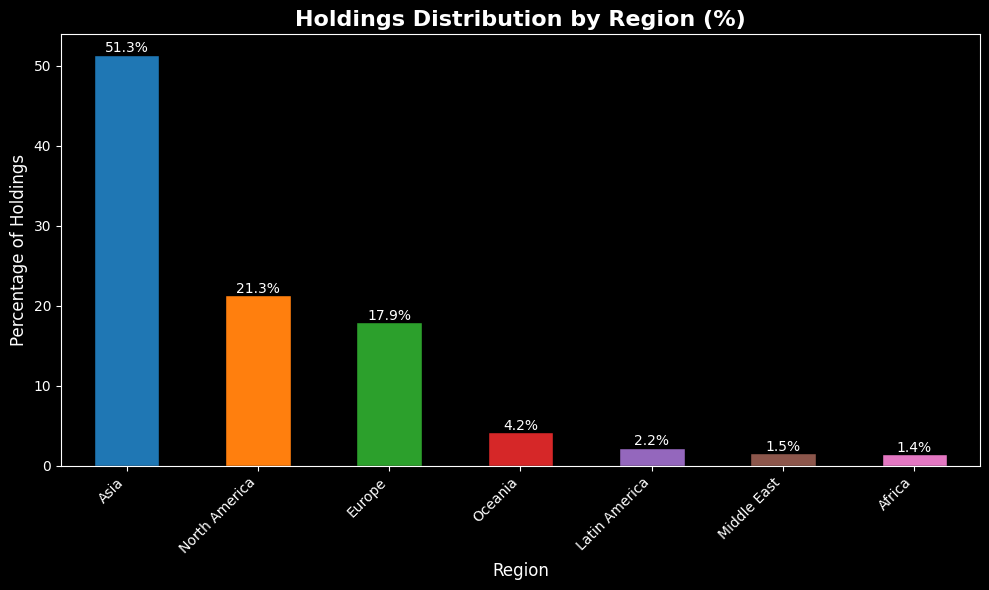

In [397]:
# Region by relative number of holdings (%)
count_relative = fund_H1_2025['Region'].value_counts(normalize=True)*100

# Choose a colormap for distinct colors
colors = plt.cm.tab10.colors[:len(count_relative)]

# Create bar chart
ax = count_relative.plot(
    kind='bar',
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Title and axis labels
plt.title('Holdings Distribution by Region (%)', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage of Holdings', fontsize=12)

# Display values on top of each bar
for i, v in enumerate(count_relative):
    ax.text(i, v + 0.3, f'{v:.1f}%', ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [396]:
fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Region']).sum().sort_values(ascending=False)

Region
North America    56.899962
Europe           22.171850
Asia             17.527353
Oceania           1.669577
Latin America     0.734239
Middle East       0.536061
Africa            0.460958
Name: Portfolio_Weight, dtype: float64

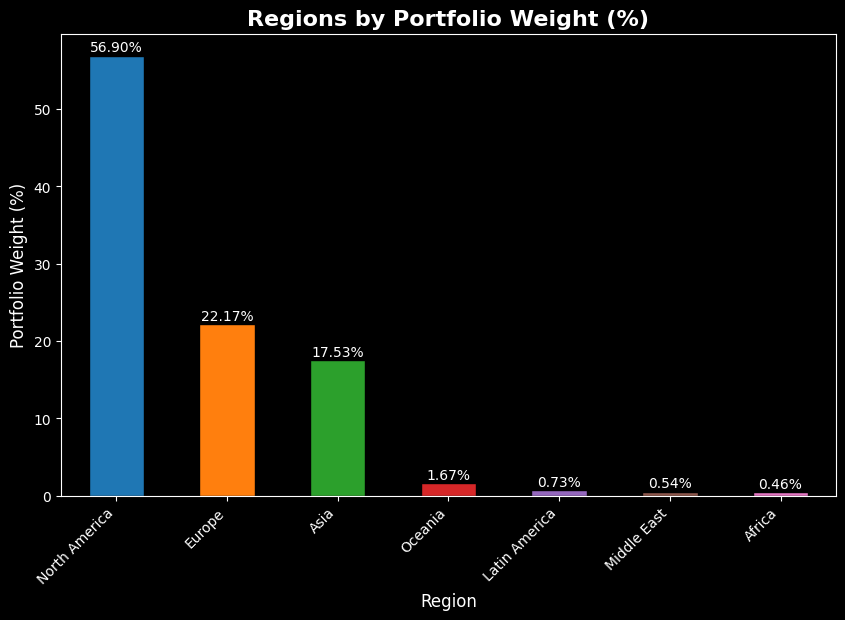

In [401]:
by_weight= fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Region']).sum().sort_values(ascending=False)
ax = by_weight.plot(kind='bar', figsize=(10,6), color=colors, edgecolor='black')
# Show values on top of bars
for i, v in enumerate(by_weight):
    ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10, color='white')
plt.xlabel('Region', fontsize=12, color='white')
plt.ylabel('Portfolio Weight (%)', fontsize=12, color='white')
plt.xticks(rotation=45, ha='right')
plt.title('Regions by Portfolio Weight (%)', fontsize=16, weight='bold')
plt.show()

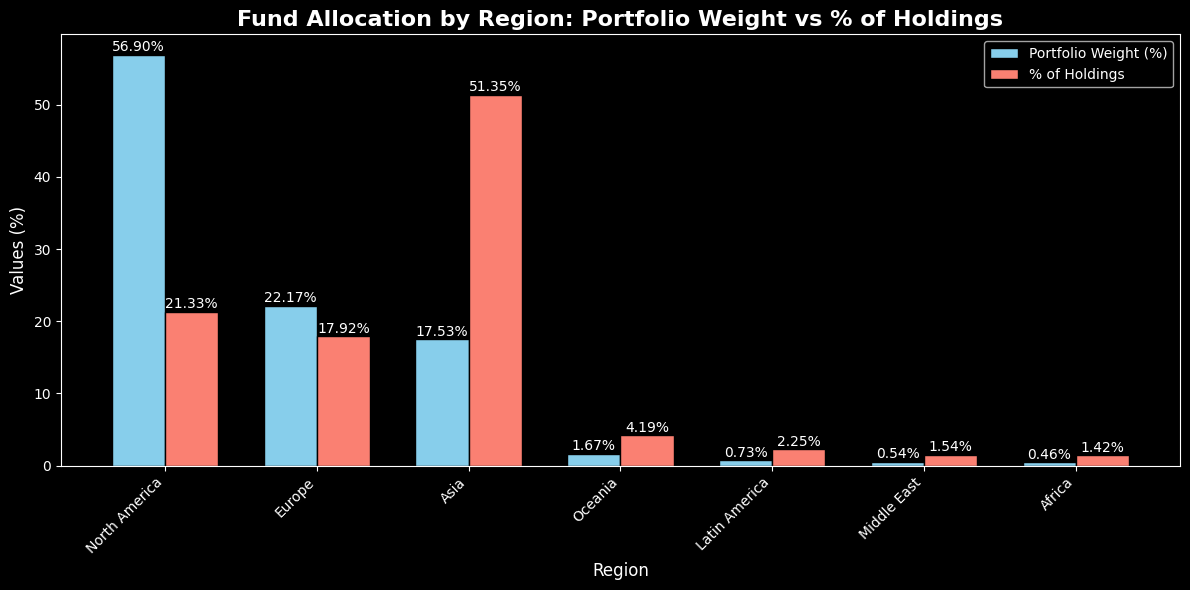

In [403]:
# Data
by_weight = fund_H1_2025['Portfolio_Weight'].groupby(fund_H1_2025['Region']).sum().sort_values(ascending=False)
by_count = (fund_H1_2025['Region'].value_counts(normalize=True) * 100).loc[by_weight.index]

x = np.arange(len(by_weight))  # x locations for the groups
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Side-by-side bars
bars1 = ax.bar(x - width/2, by_weight.values, width, label='Portfolio Weight (%)', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, by_count.values, width, label='% of Holdings', color='salmon', edgecolor='black')

# Titles and labels
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Values (%)', fontsize=12)
ax.set_title('Fund Allocation by Region: Portfolio Weight vs % of Holdings', fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(by_weight.index, rotation=45, ha='right')
ax.legend()

# Show values on top of bars in white
for i in range(len(by_weight)):
    ax.text(x[i] - width/2, by_weight.values[i] + 0.5, f'{by_weight.values[i]:.2f}%', ha='center', fontsize=10, color='white')
    ax.text(x[i] + width/2, by_count.values[i] + 0.5, f'{by_count.values[i]:.2f}%', ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

plt.show()

**Fund Allocation by Region: Holdings vs Portfolio Weight – Key Insights**

The comparison between the relative number of holdings and portfolio weight by region highlights significant differences in how the fund allocates its capital. Asia accounts for the majority of the fund’s holdings in terms of number of companies, reflecting a broad diversification across emerging and growth markets. However, North America carries the largest share of portfolio weight, indicating that these holdings are more financially significant despite being fewer in number. Europe also shows a higher portfolio weight relative to its number of holdings, suggesting targeted investments in high-value companies.

This distinction between number of holdings and capital exposure provides insight into the fund’s strategic allocation: it diversifies widely in regions like Asia while concentrating financial weight in regions with established markets such as North America and Europe. Less represented regions including Oceania, Latin America, the Middle East, and Africa collectively contribute a minor share of both holdings and portfolio weight.

# Third objective
Disclose the most relevant markets in portfolio weight terms by
1)Industry, which is Technology
")Region

# REVISAR LOS COMENTARIOS Y PULIR EL LENGUAGE Fourth Objective

1) **Top 30 companies by Voting percentage**  
   Identify the 30 companies where the fund holds the highest total Voting percentage.  
   This gives a sense of where the fund might exert the most influence and helps understand its strategic positions within the portfolio.  

2) **Holdings with Ownership–Voting discrepancies**  
   Analyze all holdings where Ownership and Voting percentages differ.  
   This allows us to explore potential governance patterns and observe cases where the fund's influence may not align directly with its equity stake.



In [ ]:
voting_top30 = fund_H1_2025.sort_values(by="Voting", ascending=False).head(30))
voting_top30

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
6796,Real Estate,Europe,United Kingdom,Shaftesbury Capital PLC,983244569,25.19,25.19,0.070843
6884,Real Estate,Europe,Germany,Vonovia SE,4234717191,14.43,14.43,0.305111
521,Basic Materials,Europe,Sweden,Svenska Cellulosa AB SCA,645914590,9.67,7.13,0.046538
6321,Real Estate,North America,United States,Alexandria Real Estate Equities Inc,1192707490,9.49,9.49,0.085935
6531,Real Estate,Europe,United Kingdom,Great Portland Estates PLC,188421107,9.44,9.44,0.013576
6512,Real Estate,Europe,France,Gecina SA,783902696,9.33,9.33,0.056480
127,Basic Materials,Europe,United Kingdom,Croda International PLC,518646885,9.27,9.27,0.037369
6474,Real Estate,North America,United States,Equity Residential,2346352683,9.15,9.15,0.169055
6761,Real Estate,North America,United States,Regency Centers Corp,1216700785,9.13,9.13,0.087663
6527,Real Estate,Europe,United Kingdom,Grainger PLC,202720322,9.07,9.07,0.014606


In [371]:
voting_top30['Industry'].value_counts()

Industry
Real Estate               18
Basic Materials            4
Financials                 3
Technology                 3
Industrials                1
Consumer Discretionary     1
Name: count, dtype: int64

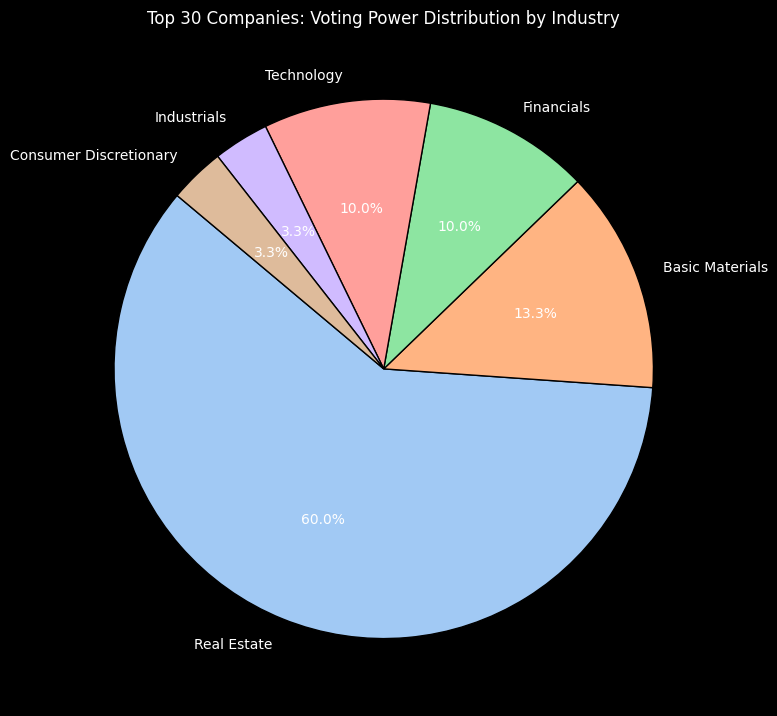

In [372]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(voting_per_industry)]
plt.pie(
    voting_per_industry, 
    labels=voting_per_industry.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top 30 Companies: Voting Power Distribution by Industry')
plt.tight_layout()
plt.show()

As a preliminary insight, the fund tends to hold larger positions in businesses that are considered relatively safe and stable over the long term, which explains its investments in Real Estate.  

Holdings in Basic Materials and Technology reflect companies with a strong innovation-for-sustainability component, while high Voting percentages in Financials point to firms with consistently strong profitability.  

Overall, high Voting power indicates that the fund can exert influence in these companies, aligning with its long-term strategic vision.  
Sustainability considerations appear particularly relevant in explaining the fund's significant ownership in Basic Materials and Technology.


2) This section investigates holdings where Ownership and Voting percentages differ, and examine these cases in more detail.  
Analyzing these discrepancies can provide a useful overview of how corporate ownership and voting structures operate in the market, and help us understand the fund's portfolio composition.


In [373]:
owned_vs_vote = fund_H1_2025['Ownership'] != fund_H1_2025['Voting']
owned_vs_vote

0       False
1       False
2       False
3       False
4       False
        ...  
8369     True
8370    False
8371    False
8372    False
8373    False
Length: 8374, dtype: bool

In [374]:
owned_vs_vote = fund_H1_2025['Ownership'] != fund_H1_2025['Voting']
num_differ = owned_vs_vote.sum()
print(f"Number of holdings where Ownership differs from Voting: {num_differ}")
print(f"Percentage of holdings with discrepancies between Ownership and Voting: {(num_differ / len(fund_H1_2025)) * 100:.2f}%")

Number of holdings where Ownership differs from Voting: 901
Percentage of holdings with discrepancies between Ownership and Voting: 10.76%


In [375]:
#Create a dataframe with only the rows where Ownership differs from Voting for further analysis
diff_vote_owned = fund_H1_2025[owned_vs_vote]
diff_vote_owned

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
35,Basic Materials,Europe,United Kingdom,Anglo American PLC,892419207,1.040469,2.57,6.429882e-02
45,Basic Materials,Europe,France,Arkema SA,172774835,2.470000,3.09,1.244843e-02
66,Basic Materials,Europe,Sweden,Beijer Alma AB,3765934,0.130000,0.26,2.713356e-04
77,Basic Materials,Latin America,Brazil,Braskem SA,39649526,1.040469,2.99,2.856749e-03
92,Basic Materials,North America,United States,Century Aluminum Co,18921,1.040469,0.00,1.363258e-06
...,...,...,...,...,...,...,...,...
8305,Utilities,Asia,India,ReNew Energy Global PLC,3128834,0.190000,0.12,2.254326e-04
8315,Utilities,Europe,Russia,RusHydro PJSC,0,1.040469,0.00,0.000000e+00
8357,Utilities,Europe,Poland,Unimot SA,5749867,1.780000,1.86,4.142780e-04
8358,Utilities,Europe,Russia,Unipro PJSC,0,1.040469,0.00,0.000000e+00


In [376]:
#Checking if the difference tends to be more voting higher than ownership or viceversa
# Create boolean masks for direction of discrepancy
voting_higher = diff_vote_owned['Voting'] > diff_vote_owned['Ownership']
ownership_higher = diff_vote_owned['Ownership'] > diff_vote_owned['Voting']

In [377]:
# Add a new column to diff_vote_owned to indicate which is higher
diff_vote_owned['Discrepancy_Type'] = ['Voting > Ownership' if v else 'Ownership > Voting' 
                                       for v in voting_higher]

C:\Users\Jose Fernando Barros\AppData\Local\Temp\ipykernel_41568\1816497702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_vote_owned['Discrepancy_Type'] = ['Voting > Ownership' if v else 'Ownership > Voting'


Discrepancy_Type
Ownership > Voting    459
Voting > Ownership    442
Name: count, dtype: int64


<Axes: xlabel='Discrepancy_Type'>

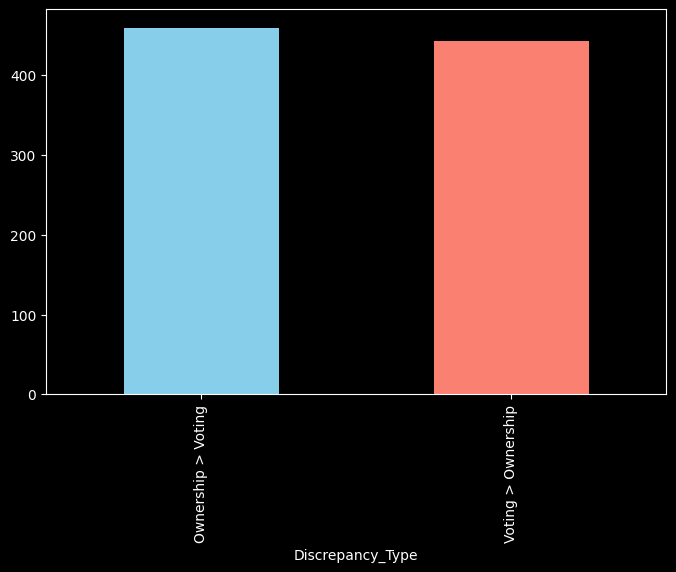

In [378]:
print(diff_vote_owned['Discrepancy_Type'].value_counts())
diff_vote_owned['Discrepancy_Type'].value_counts().plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])


In [379]:
diff_vote_owned.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Discrepancy_Type
35,Basic Materials,Europe,United Kingdom,Anglo American PLC,892419207,1.040469,2.57,0.064299,Ownership > Voting
45,Basic Materials,Europe,France,Arkema SA,172774835,2.470000,3.09,0.012448,Ownership > Voting


In [380]:
# Taking a look at the industries with most discrepancies
diff_vote_owned['Industry'].value_counts()

Industry
Consumer Discretionary    195
Industrials               157
Technology                123
Financials                102
Health Care                93
Real Estate                61
Basic Materials            48
Consumer Staples           45
Utilities                  32
Telecommunications         28
Energy                     17
Name: count, dtype: int64

In [381]:
count = diff_vote_owned['Industry'].value_counts()
pct = (count / count.sum()) * 100
pct

Industry
Consumer Discretionary    21.642619
Industrials               17.425083
Technology                13.651498
Financials                11.320755
Health Care               10.321865
Real Estate                6.770255
Basic Materials            5.327414
Consumer Staples           4.994451
Utilities                  3.551609
Telecommunications         3.107658
Energy                     1.886792
Name: count, dtype: float64

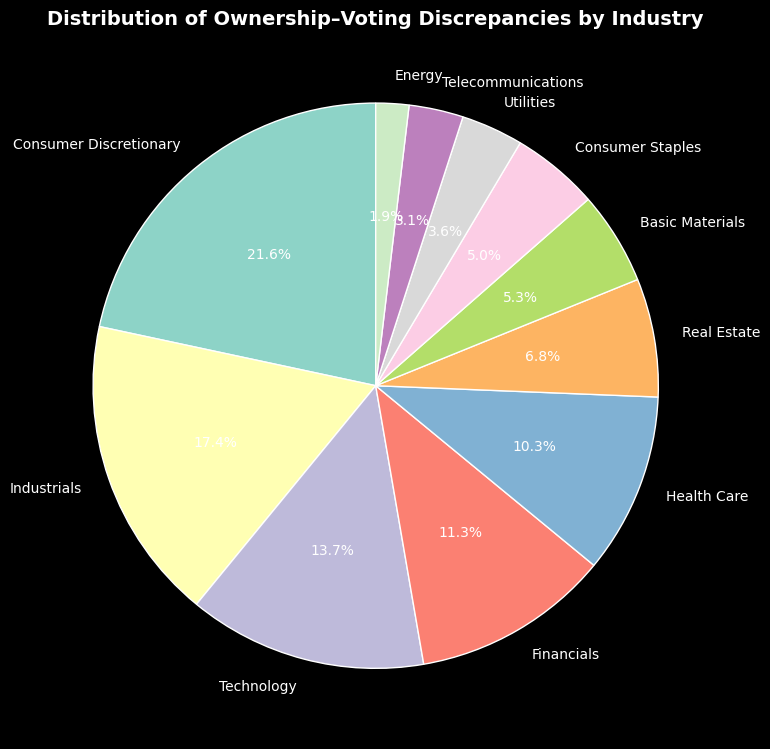

In [382]:
# Visualizing the distribution of discrepancies by industry

plt.figure(figsize=(8, 8))
plt.pie(
    pct,
    labels=pct.index,
    autopct='%1.1f%%',  
    startangle=90,       # starts from the top
    colors=plt.cm.Set3.colors,  
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title('Distribution of Ownership–Voting Discrepancies by Industry', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

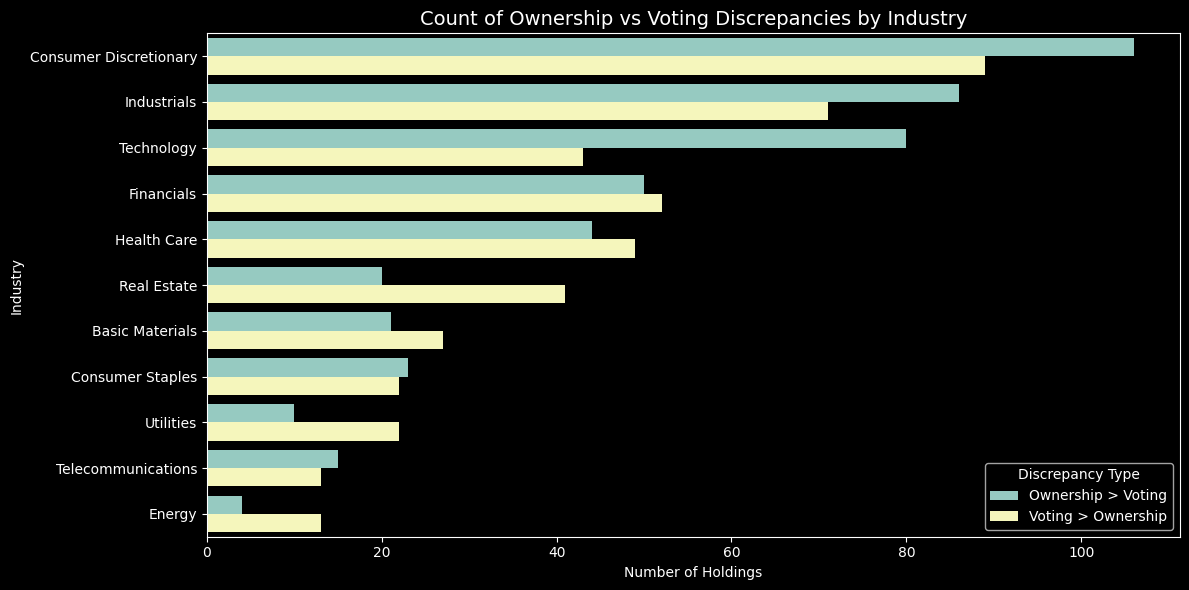

In [383]:
#  Count plot by Industry

plt.figure(figsize=(12,6))
sns.countplot(data=diff_vote_owned, y='Industry', hue='Discrepancy_Type', order=diff_vote_owned['Industry'].value_counts().index)
plt.title('Count of Ownership vs Voting Discrepancies by Industry', fontsize=14)
plt.xlabel('Number of Holdings')
plt.ylabel('Industry')
plt.legend(title='Discrepancy Type')
plt.tight_layout()
plt.show()

Industry Breakdown of Ownership–Voting Discrepancies:

The majority of discrepancies between ownership and voting rights are concentrated in a few sectors.  
Consumer Discretionary (~22.6%), Industrials (~18.4%), and Technology (~15.7%) together account for more than half of all cases.  
This pattern may reflect the prevalence of multi-class share structures and complex ownership models that are more common in large, innovation-driven or global consumer companies.


In [384]:
count = diff_vote_owned['Country'].value_counts()
pct = (count / count.sum()) * 100
pct

Country
United States           27.857936
China                   13.651498
France                  10.099889
Sweden                   8.990011
Taiwan                   4.661487
Italy                    4.550499
South Korea              3.440622
Canada                   2.885683
Japan                    2.330744
Brazil                   2.219756
Hong Kong                2.108768
Poland                   2.108768
Germany                  1.442841
Denmark                  1.331853
India                    1.220866
Mexico                   0.998890
Russia                   0.998890
Thailand                 0.998890
Australia                0.998890
Finland                  0.887902
United Kingdom           0.887902
Belgium                  0.776915
Switzerland              0.554939
South Africa             0.554939
Malaysia                 0.554939
Sri Lanka                0.332963
Spain                    0.332963
Indonesia                0.332963
Netherlands              0.221976
Singap

In [385]:
count=fund_H1_2025.groupby('Country')['Market_Value_USD'].sum()
country_market_value_percentage = (count / count.sum()) * 100
country_market_value_percentage.sort_values(ascending=False).head(17)

Country
United States     54.714662
Japan              6.328589
United Kingdom     5.091178
Germany            3.542248
China              3.508865
Switzerland        3.081551
France             3.038944
Taiwan             2.362666
India              2.333999
Canada             2.185300
Netherlands        1.794137
Australia          1.599517
South Korea        1.376367
Sweden             1.147122
Spain              1.050234
Italy              1.024560
Denmark            0.887597
Name: Market_Value_USD, dtype: float64

Country Distribution of Portfolio vs Discrepancies

While the majority of Ownership–Voting discrepancies occur in U.S. holdings (~33%), the U.S. accounts for a much larger share of the fund's total portfolio (~55%).  
This indicates that discrepancies are **not strictly proportional to the portfolio weight** by country, suggesting they are driven more by corporate share structures than by investment size.


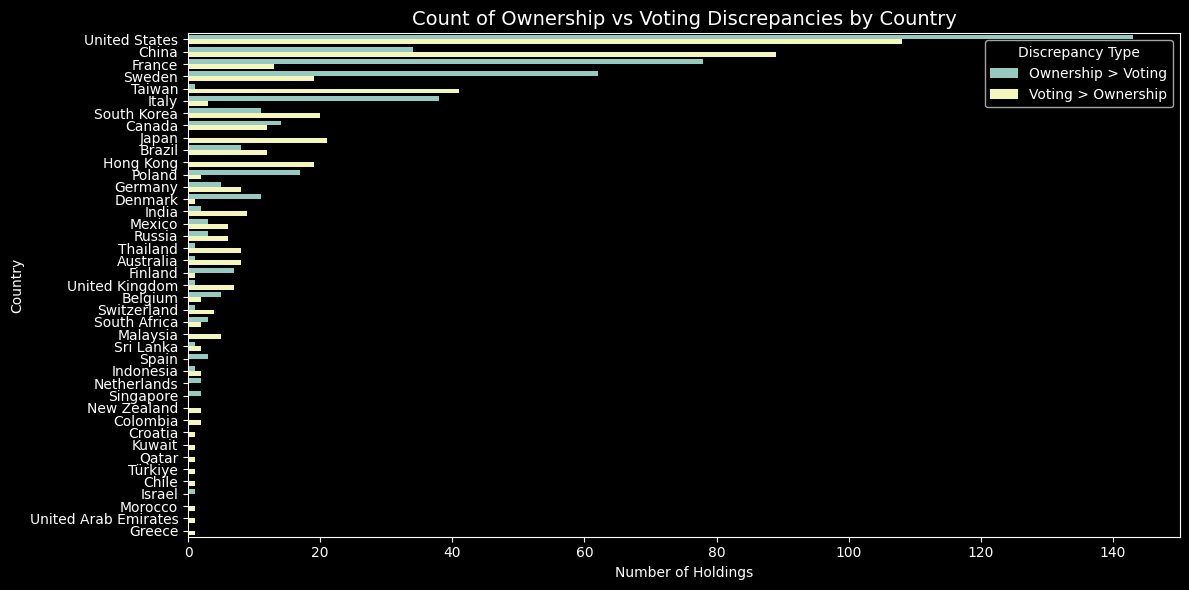

In [386]:
#Count plot by Country

plt.figure(figsize=(12,6))
sns.countplot(data=diff_vote_owned, y='Country', hue='Discrepancy_Type', order=diff_vote_owned['Country'].value_counts().index)
plt.title('Count of Ownership vs Voting Discrepancies by Country', fontsize=14)
plt.xlabel('Number of Holdings')
plt.ylabel('Country')
plt.legend(title='Discrepancy Type')
plt.tight_layout()
plt.show()

In [387]:
#Top 15 discrepancies by Portfolio Weight
diff_vote_owned.sort_values(by='Portfolio_Weight', ascending=False).head(30)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight,Discrepancy_Type
6938,Technology,North America,United States,Alphabet Inc,26165252659,0.860000,1.22,1.885207,Ownership > Voting
7469,Technology,North America,United States,Meta Platforms Inc,23028019765,0.560000,1.24,1.659169,Ownership > Voting
2979,Financials,North America,United States,Berkshire Hathaway Inc,10723223683,1.560000,0.54,0.772609,Voting > Ownership
6207,Industrials,North America,United States,Visa Inc,6970484330,1.150000,1.06,0.502224,Voting > Ownership
5549,Industrials,North America,United States,Mastercard Inc,6719438572,1.330000,1.32,0.484136,Voting > Ownership
4450,Health Care,Europe,Switzerland,Roche Holding AG,5837378741,0.080000,2.22,0.420583,Ownership > Voting
4352,Health Care,Europe,Denmark,Novo Nordisk A/S,5537177056,0.570000,1.79,0.398954,Ownership > Voting
8046,Telecommunications,Asia,South Korea,Samsung Electronics Co Ltd,4169102217,1.390000,1.63,0.300384,Ownership > Voting
6453,Real Estate,North America,United States,Digital Realty Trust Inc,3807485744,6.480000,6.36,0.274329,Voting > Ownership
7566,Technology,North America,United States,Palantir Technologies Inc,3566151375,0.810000,1.11,0.256941,Ownership > Voting


In [388]:
#Top 15 holdings by Portfolio Weight
fund_H1_2025.sort_values(by='Portfolio_Weight', ascending=False).head(15)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
7541,Technology,North America,United States,NVIDIA Corp,51074326579,1.32,1.32,3.679906
7477,Technology,North America,United States,Microsoft Corp,49861797013,1.35,1.35,3.592544
6961,Technology,North America,United States,Apple Inc,38344977557,1.25,1.25,2.762756
664,Consumer Discretionary,North America,United States,Amazon.com Inc,27280235373,1.17,1.17,1.965542
6938,Technology,North America,United States,Alphabet Inc,26165252659,0.86,1.22,1.885207
7469,Technology,North America,United States,Meta Platforms Inc,23028019765,0.56,1.24,1.659169
7029,Technology,North America,United States,Broadcom Inc,18353783949,1.42,1.42,1.322391
7759,Technology,Asia,Taiwan,Taiwan Semiconductor Manufacturing Co Ltd,17406706904,1.85,1.85,1.254154
1833,Consumer Discretionary,North America,United States,Tesla Inc,11692457234,1.14,1.14,0.842442
2979,Financials,North America,United States,Berkshire Hathaway Inc,10723223683,1.56,0.54,0.772609


In [389]:
p_80_weight = fund_H1_2025['Portfolio_Weight'].quantile(0.8)
p_80_weight_df = fund_H1_2025[fund_H1_2025['Portfolio_Weight'] >= p_80_weight]
p_80_weight_df.head(2)

,Industry,Region,Country,Name,Market_Value_USD,Voting,Ownership,Portfolio_Weight
11,Basic Materials,North America,Canada,Agnico Eagle Mines Ltd,996265012,1.66,1.66,0.071781
14,Basic Materials,Europe,France,Air Liquide SA,2483622535,1.55,1.55,0.178945


In [390]:
p_80_weight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1675 entries, 11 to 8366
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Industry          1675 non-null   object 
 1   Region            1675 non-null   object 
 2   Country           1675 non-null   object 
 3   Name              1675 non-null   object 
 4   Market_Value_USD  1675 non-null   int64  
 5   Voting            1675 non-null   float64
 6   Ownership         1675 non-null   float64
 7   Portfolio_Weight  1675 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.8+ KB


In [391]:
# Filtrar las filas de p_80_weight_df que también están en diff_vote_owned
high_weight_discrepancies = p_80_weight_df[p_80_weight_df['Name'].isin(diff_vote_owned['Name'])]

# Calcular porcentaje sobre el total del percentil 80
percentage = (len(high_weight_discrepancies) / len(p_80_weight_df)) * 100
print(f"Percentage of holdings in the top 20% by weight with Ownership-Voting discrepancies: {percentage:.2f}%")


Percentage of holdings in the top 20% by weight with Ownership-Voting discrepancies: 12.42%


Approximately 12% of the top 20% holdings by Portfolio Weight exhibit Ownership–Voting discrepancies.  
This suggests that these discrepancies are **not predominantly concentrated among the largest positions**, and likely have limited impact on the fund's overall portfolio composition.
